In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [4]:
data_energy = pd.read_csv('energydata_complete.csv')

In [5]:
for num in data_energy['RH_5']:
    try:
        float(num)*0
    except:
        print('Non numerical value found')
        data_energy.loc[data_energy['RH_5']==num,'RH_5']=None

Non numerical value found


In [6]:
data_energy['date']=pd.to_datetime(data_energy['date'])
data_energy['RH_5']=pd.to_numeric(data_energy['RH_5'])

In [7]:
data_energy.head(3)
(data_energy.columns)

Index(['date', 'Energy kWh', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

D:\Users\SAleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


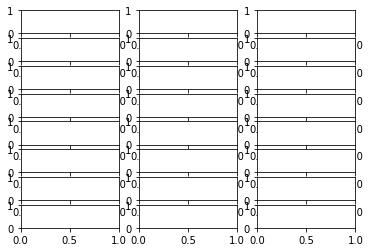

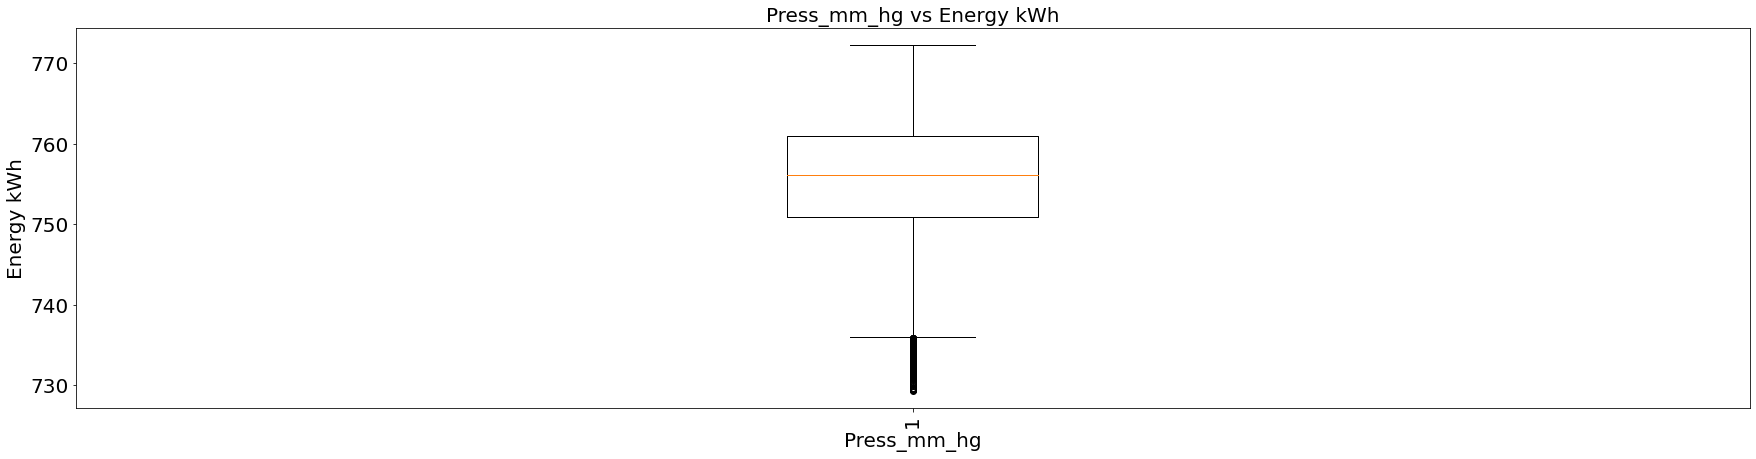

KeyboardInterrupt: 

In [8]:
numeric_cols2 = ['Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','T1', 'T2','T3','T4','T5','T6','T7','T8', 'T9','T_out',
               'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9', 'RH_out']

# numeric_cols2 = ['Energy kWh']

for cols in numeric_cols2:
    plt.subplots(8,3)
    plt.figure(figsize=(30,7))
    plt.title(cols+' vs Energy kWh',fontdict={'fontsize': 20})
    plt.boxplot(data=data_energy,x=cols)
    # plt.xlabel('hour_minute')
    plt.xticks(fontsize=20,rotation = 90)
    plt.yticks(fontsize=20)
    plt.xlabel(cols,fontdict={'fontsize': 20})
    plt.ylabel('Energy kWh',fontdict={'fontsize': 20})
plt.show()

In [20]:
data_energy.shape[1]-1

25

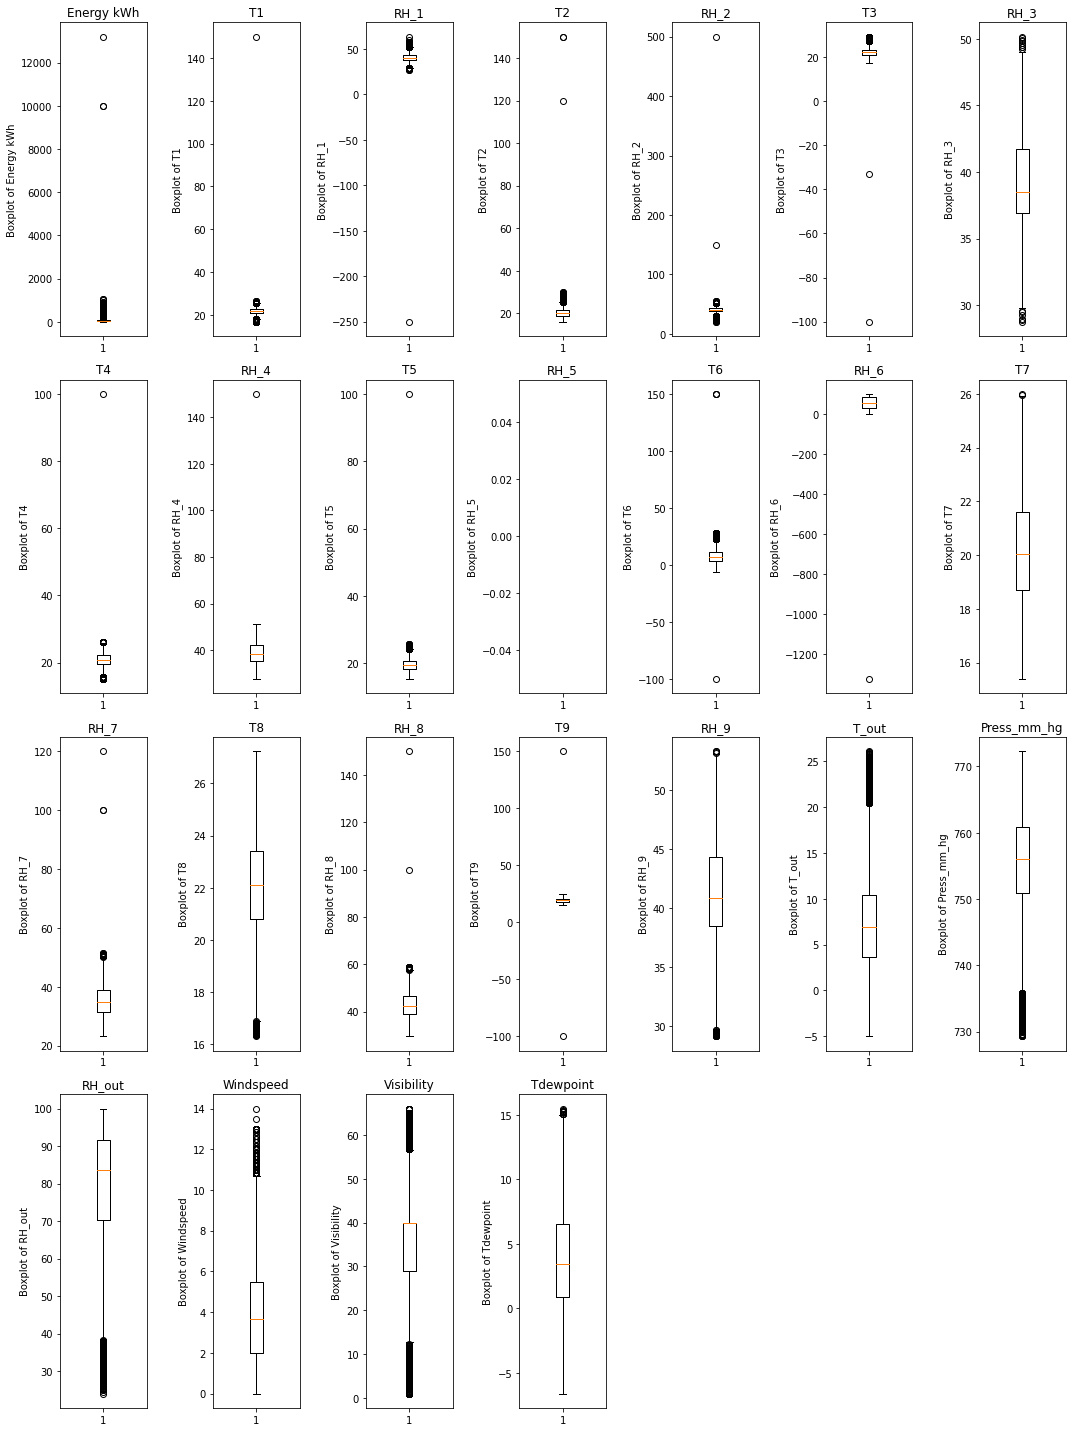

In [10]:
data_vis = data_energy.drop('date',axis=1)
# Calculate the number of subplots
num_plots = data_vis.shape[1]

# Calculate the number of rows and columns for the subplots
num_rows = 4
num_cols = 7

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each column and plot in a separate subplot
for i, column in enumerate(data_vis.columns):
    # Select the current subplot
    ax = axes[i]

    # Plot the column data
    ax.boxplot(data_vis[column])
    ax.set_ylabel('Boxplot of '+column)


    # Set the subplot title
    ax.set_title(column)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [12]:
def find_outliers(df):
    df2 = df.copy()
    cols = list(df.columns)
    cols.remove('Energy kWh')
#     print(cols)
    outlier_df = pd.DataFrame()
    clean_df = pd.DataFrame()
    df2['outlier']=''
    df2['column_value'] = ''
    for col in cols:
        q3 = np.quantile(df2[col],0.9)
        q1 = np.quantile(df2[col],0.1)
        iqr = q3-q1

        lower_range = q1 - (iqr*1.5)
        upper_range = q3 + (iqr*1.5)
        
        df2.loc[(df2[col]<lower_range)|(df2[col]>upper_range),['outlier','column_value']] = 'yes',col
        
    outlier_df = df2.loc[df2['outlier']=='yes']
    clean_df = df2.loc[df2['outlier']!='yes']
    clean_df = clean_df.loc[clean_df['Energy kWh']<7000]
        
    print('outlier_df:',outlier_df.shape)
    print('clean_df:',clean_df.shape)

    return outlier_df,clean_df

In [13]:
outlier_df,clean_df = find_outliers(data_energy)

outlier_df: (23, 28)
clean_df: (19709, 28)


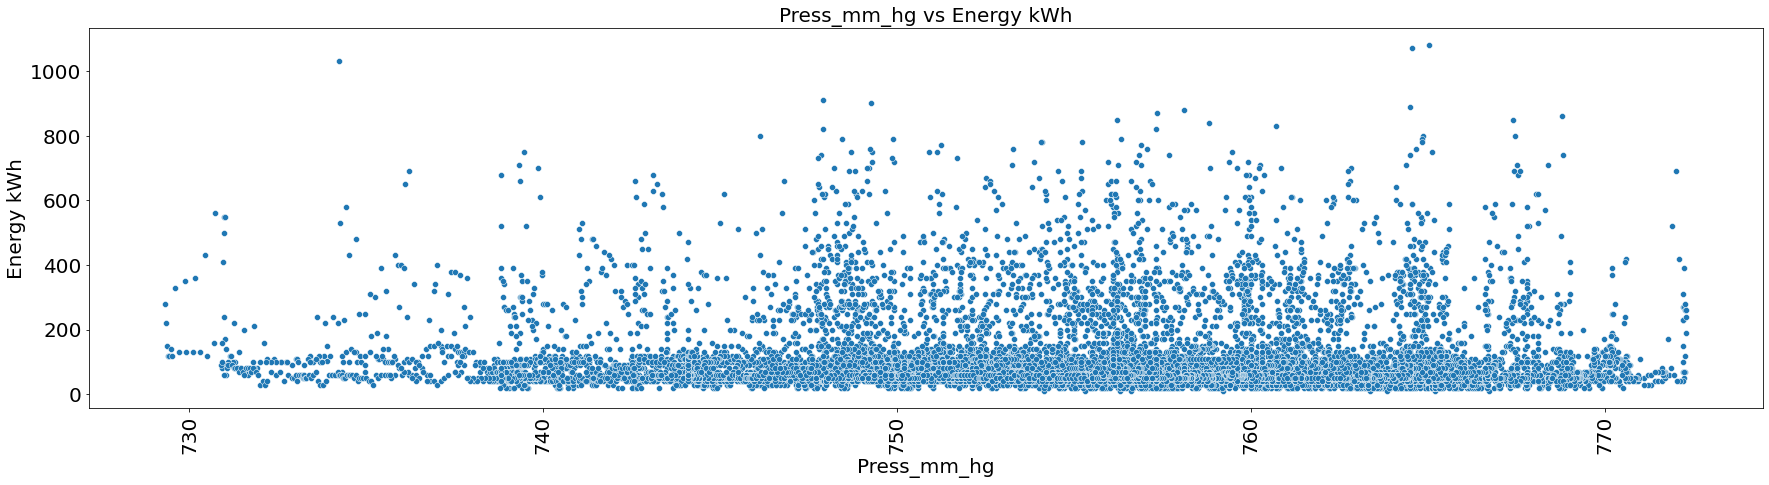

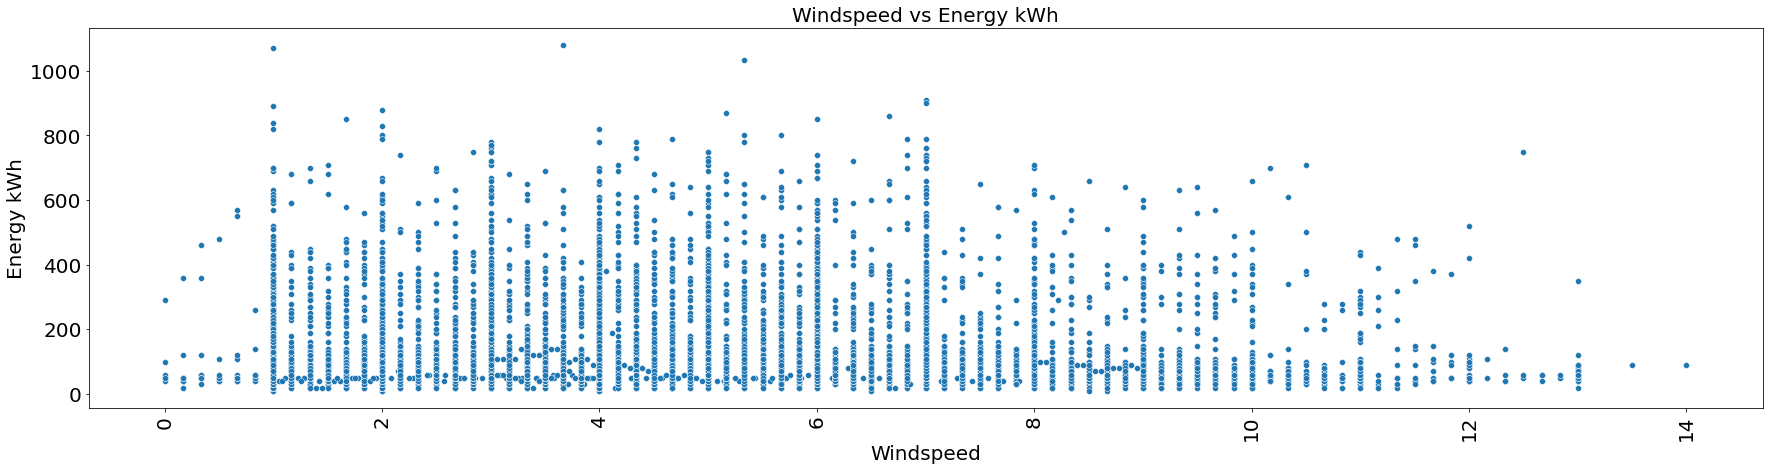

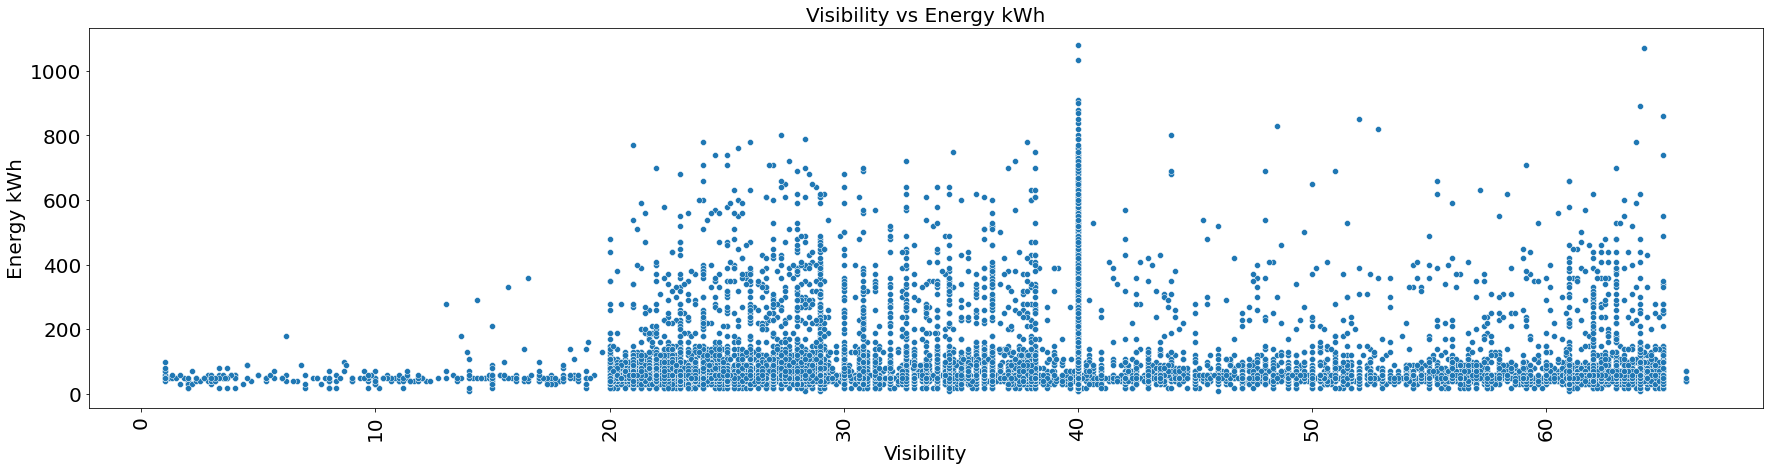

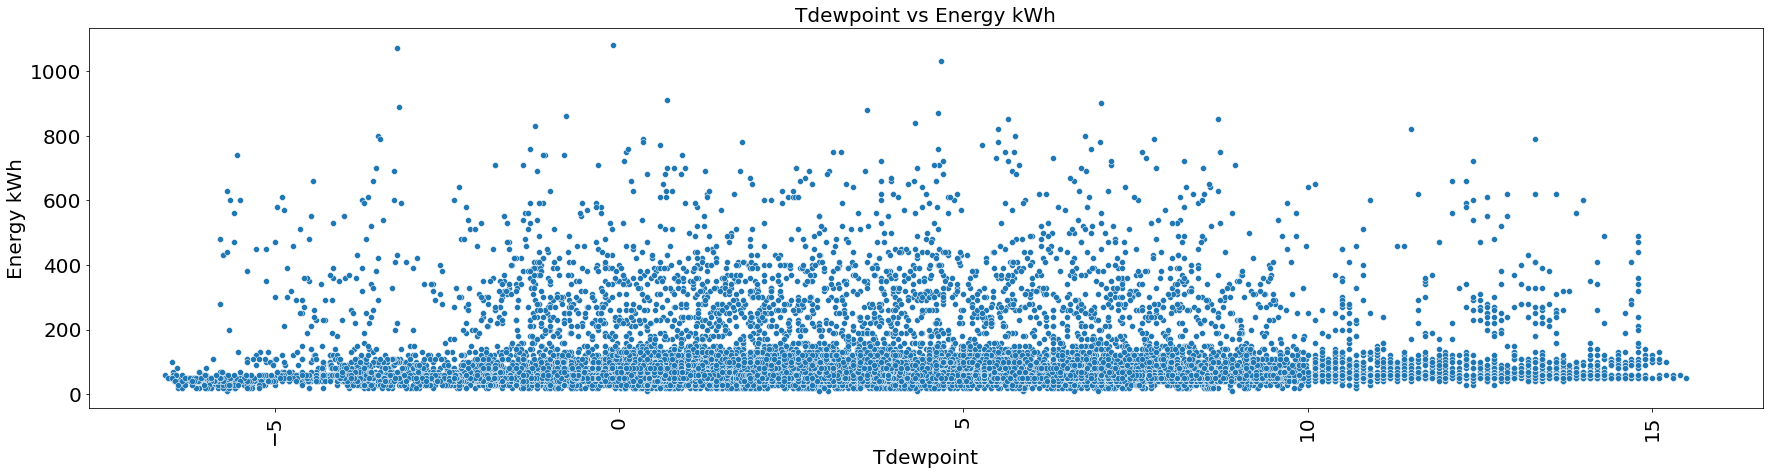

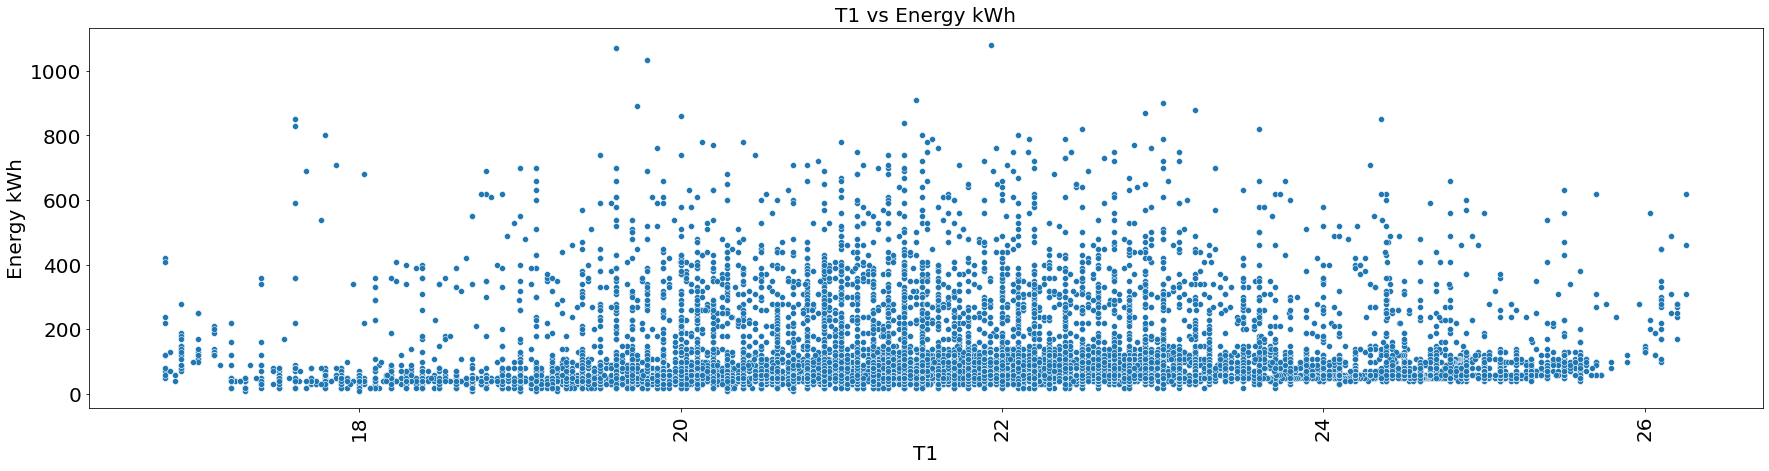

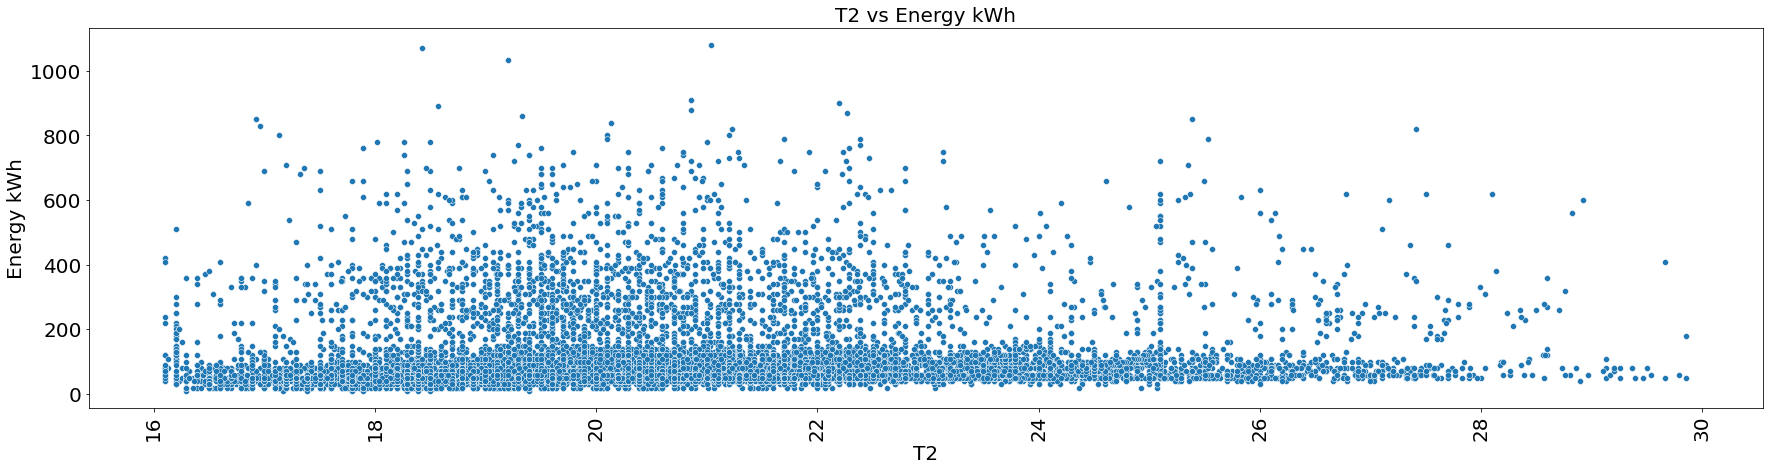

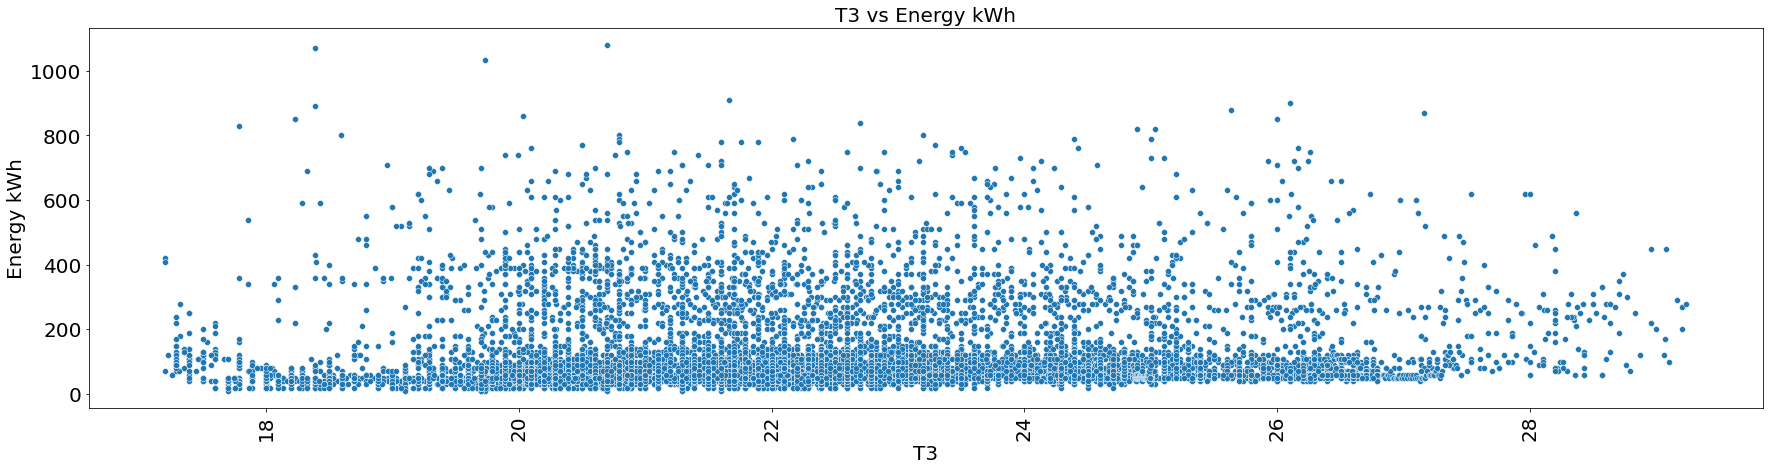

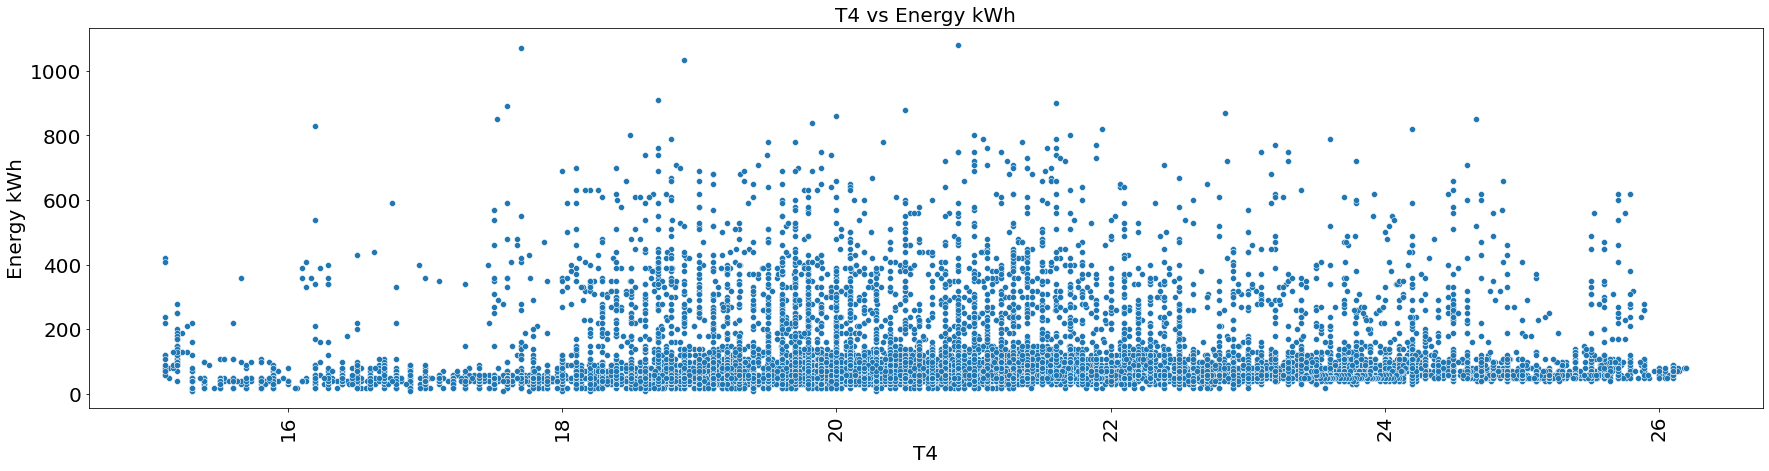

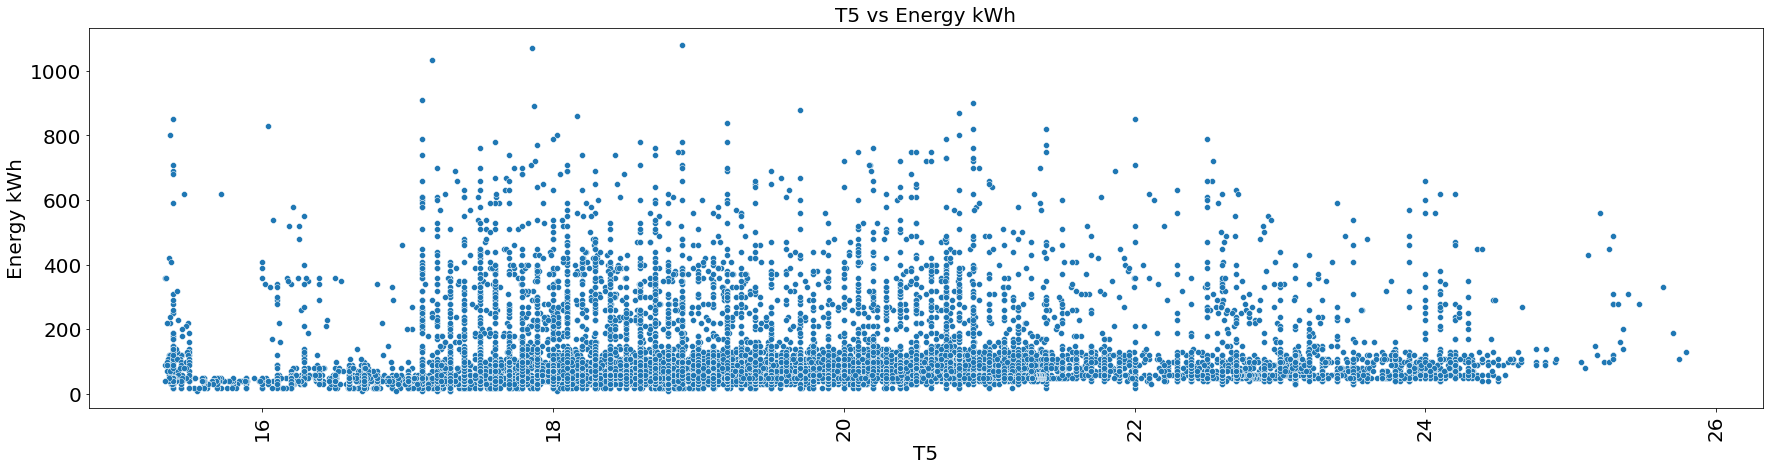

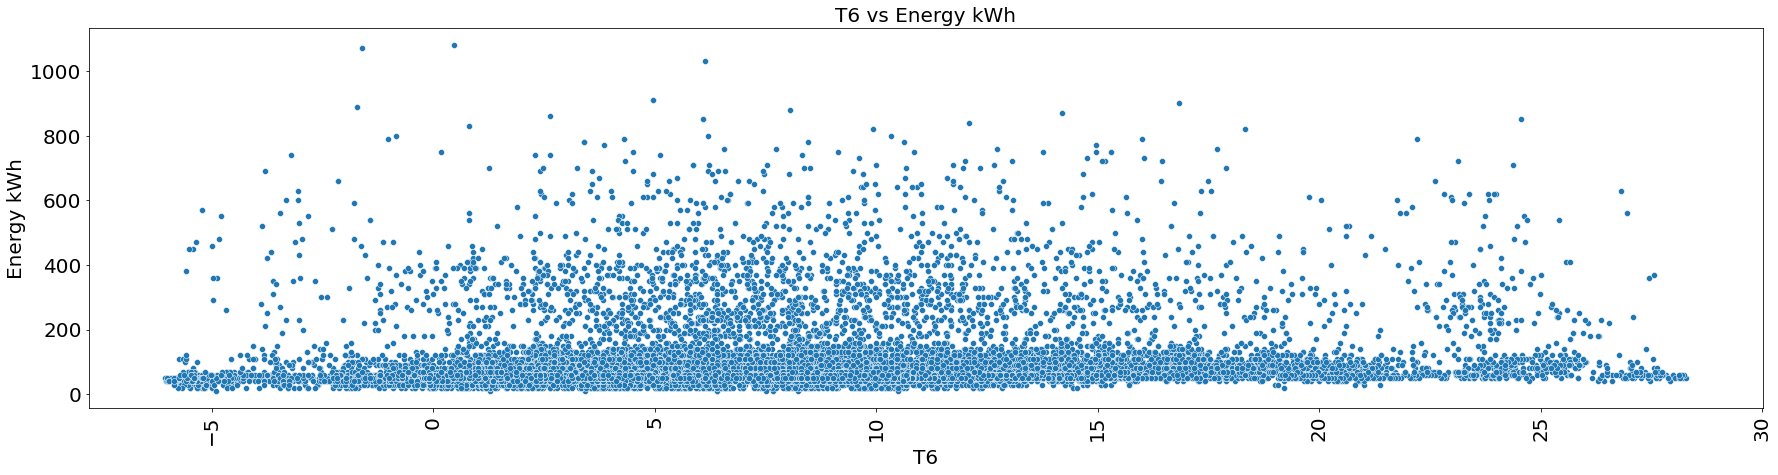

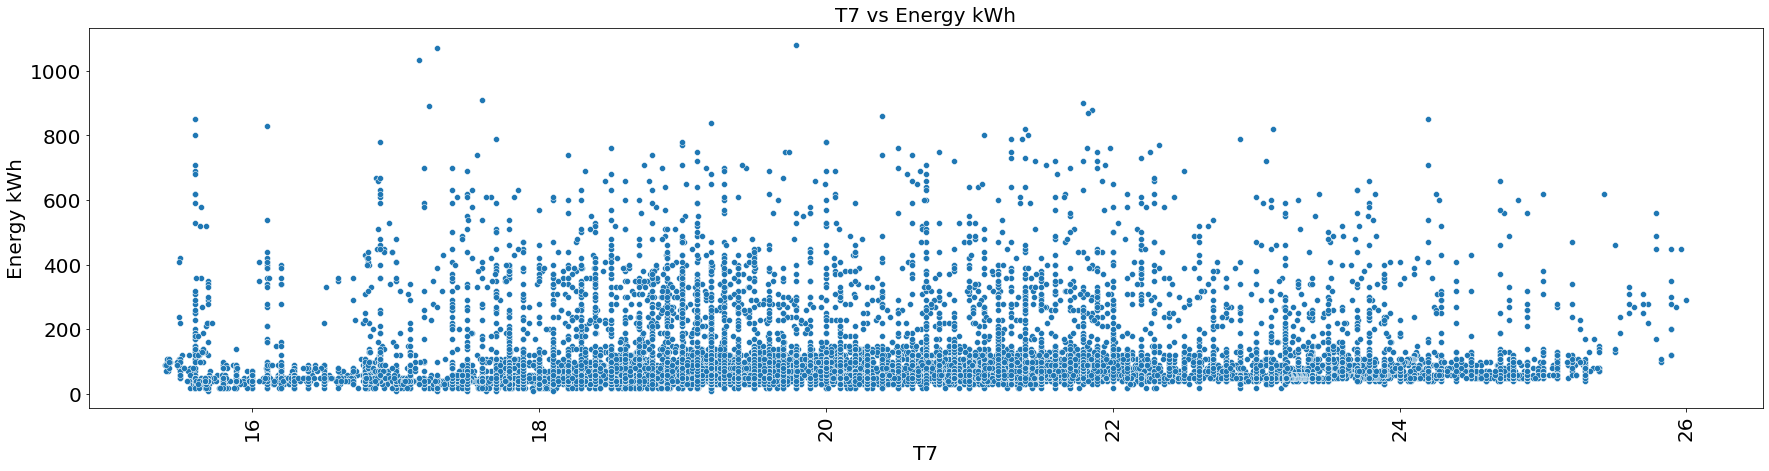

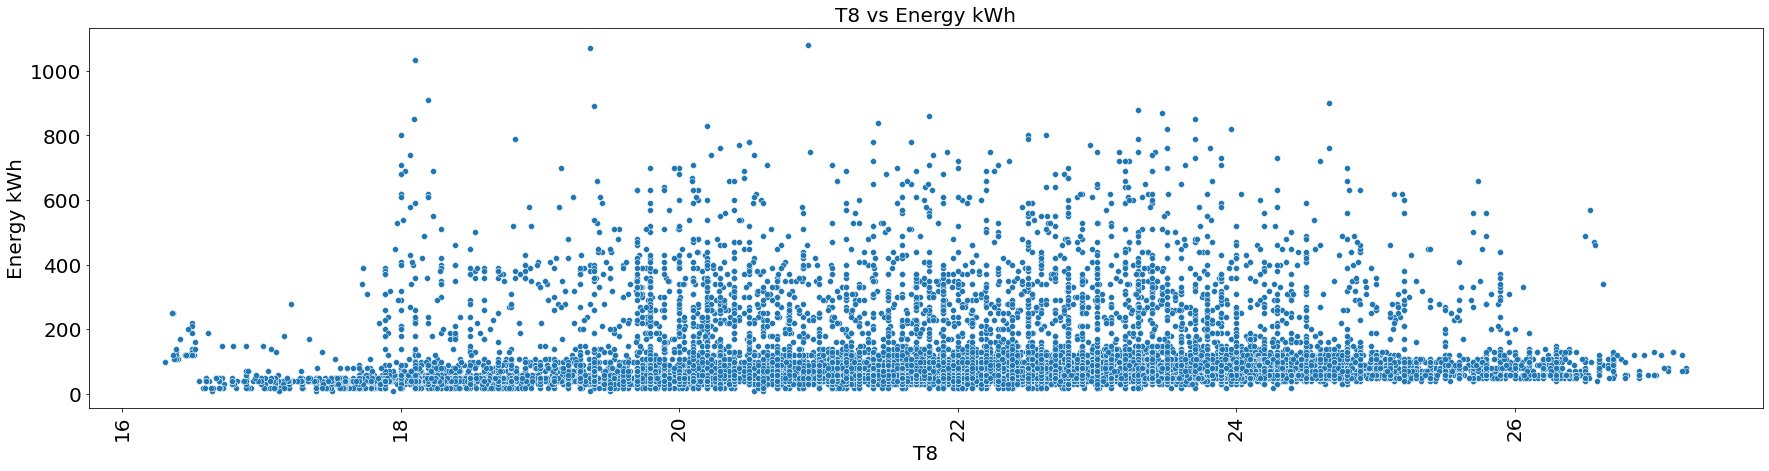

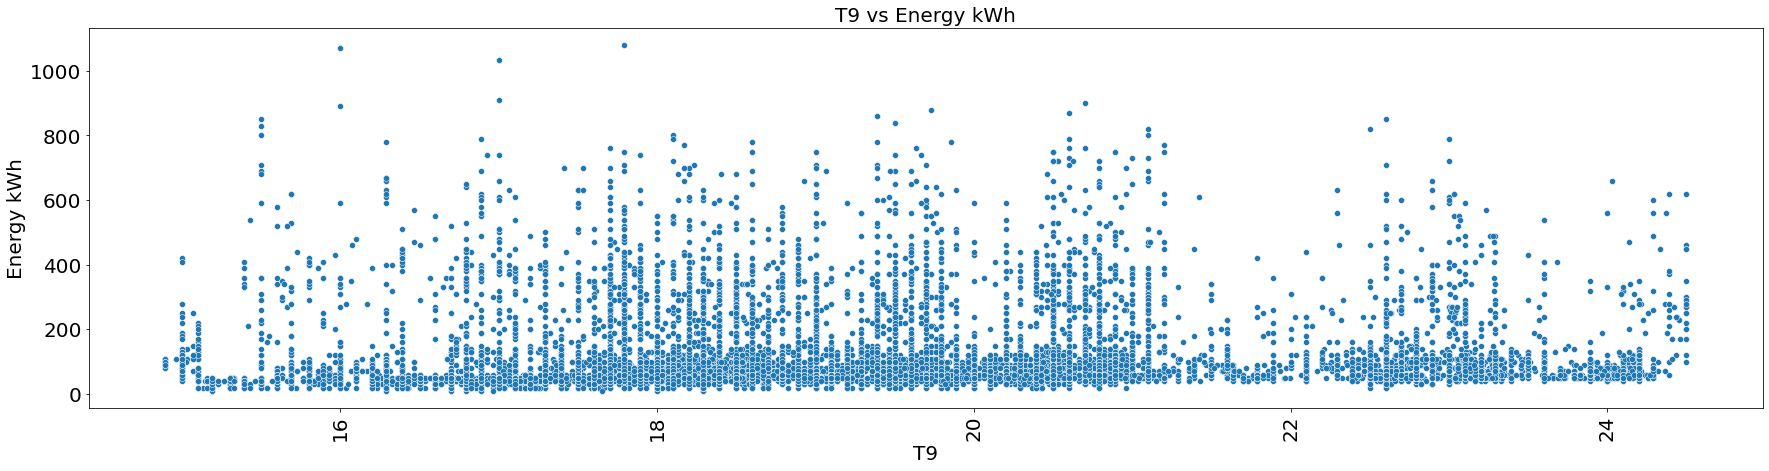

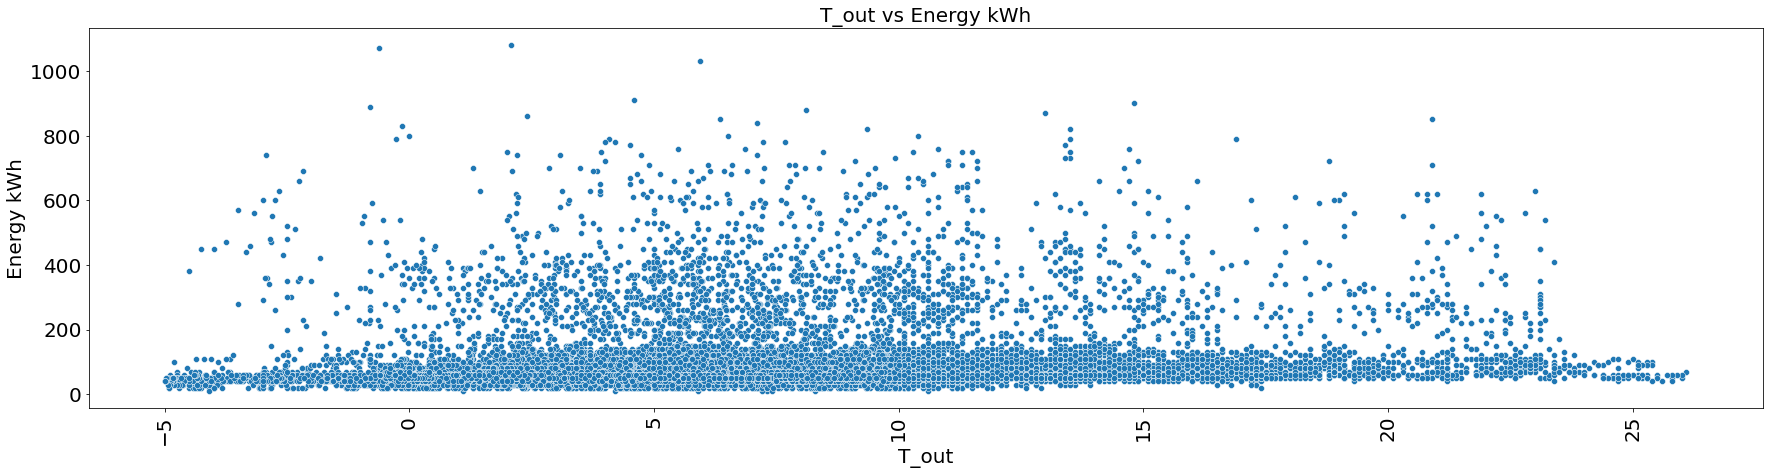

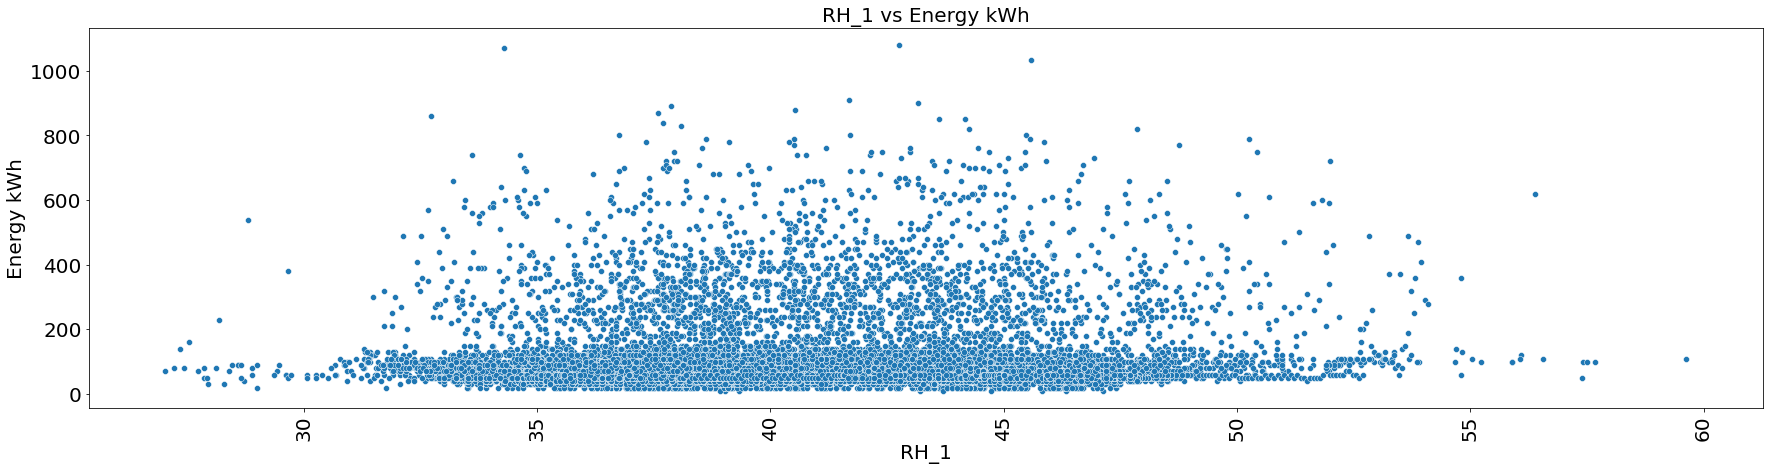

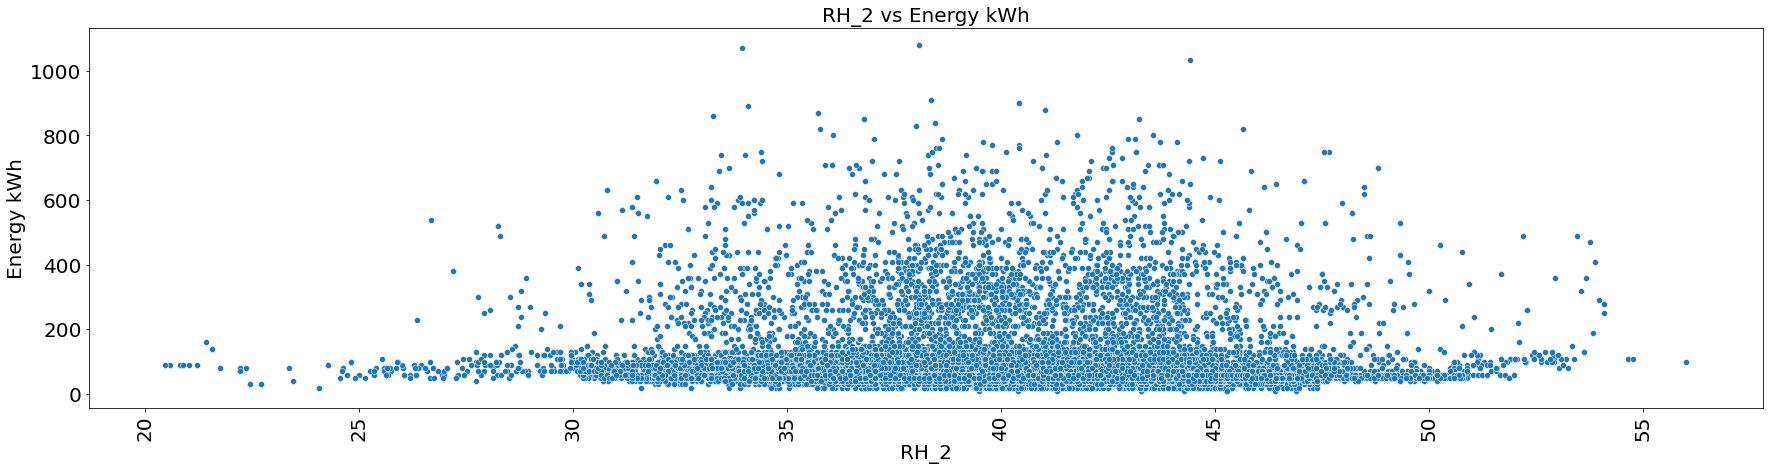

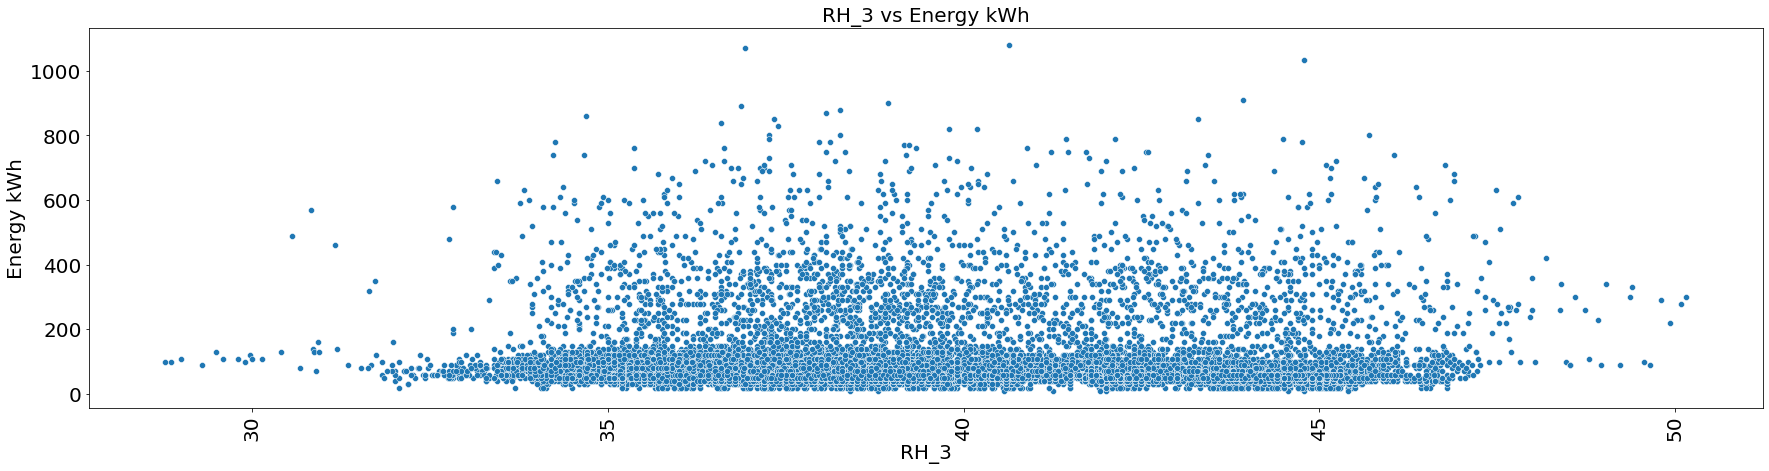

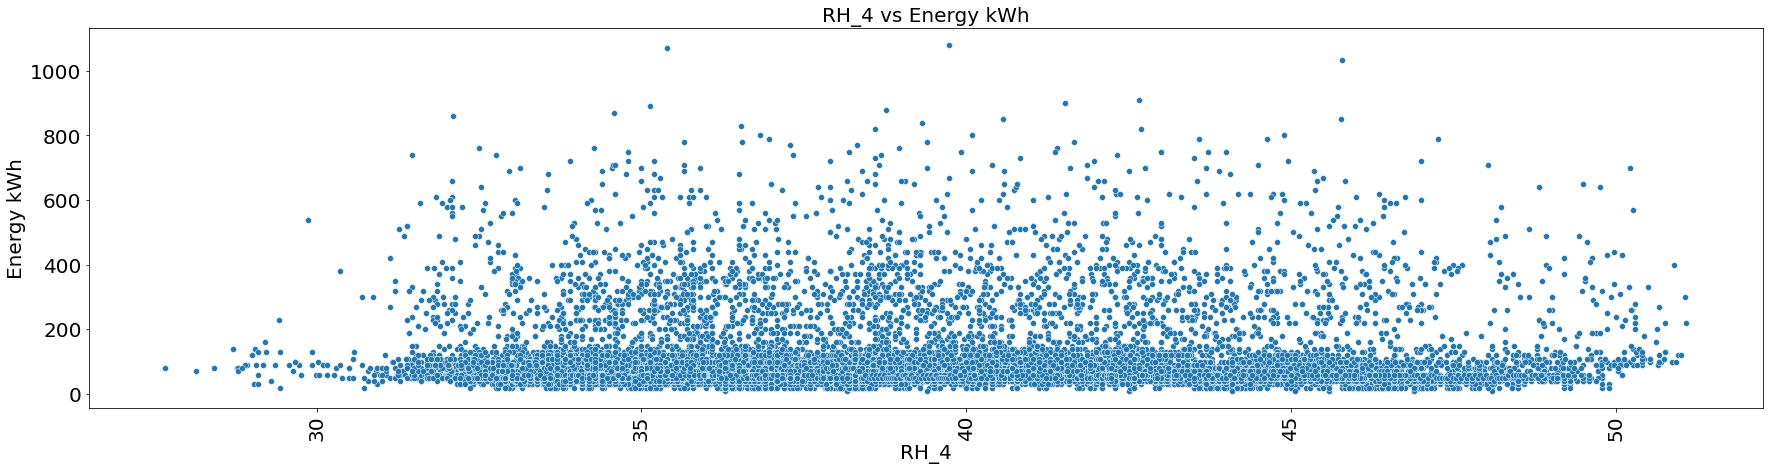

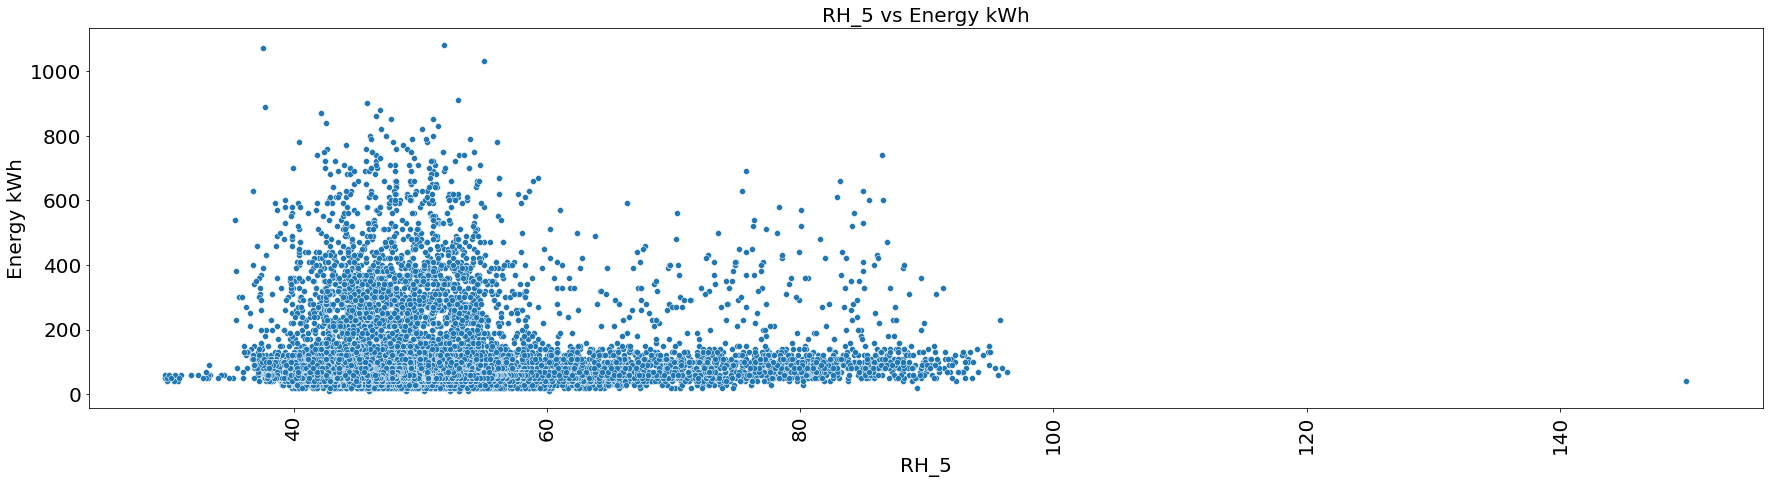

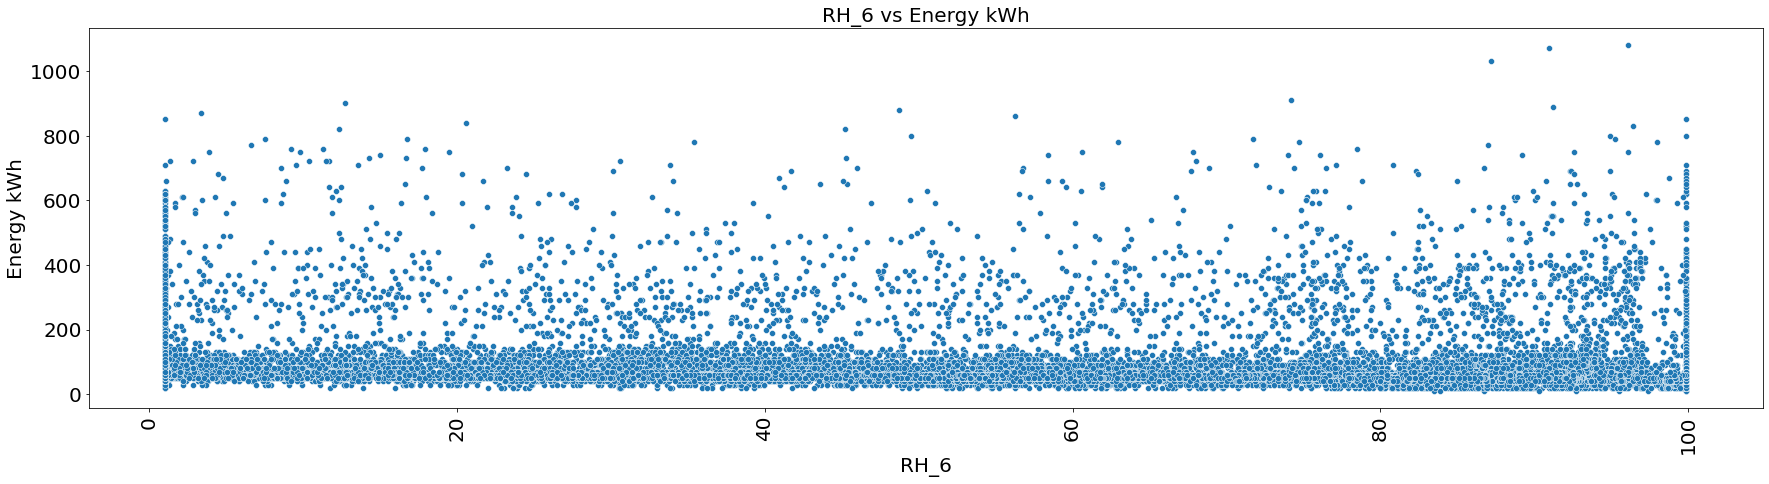

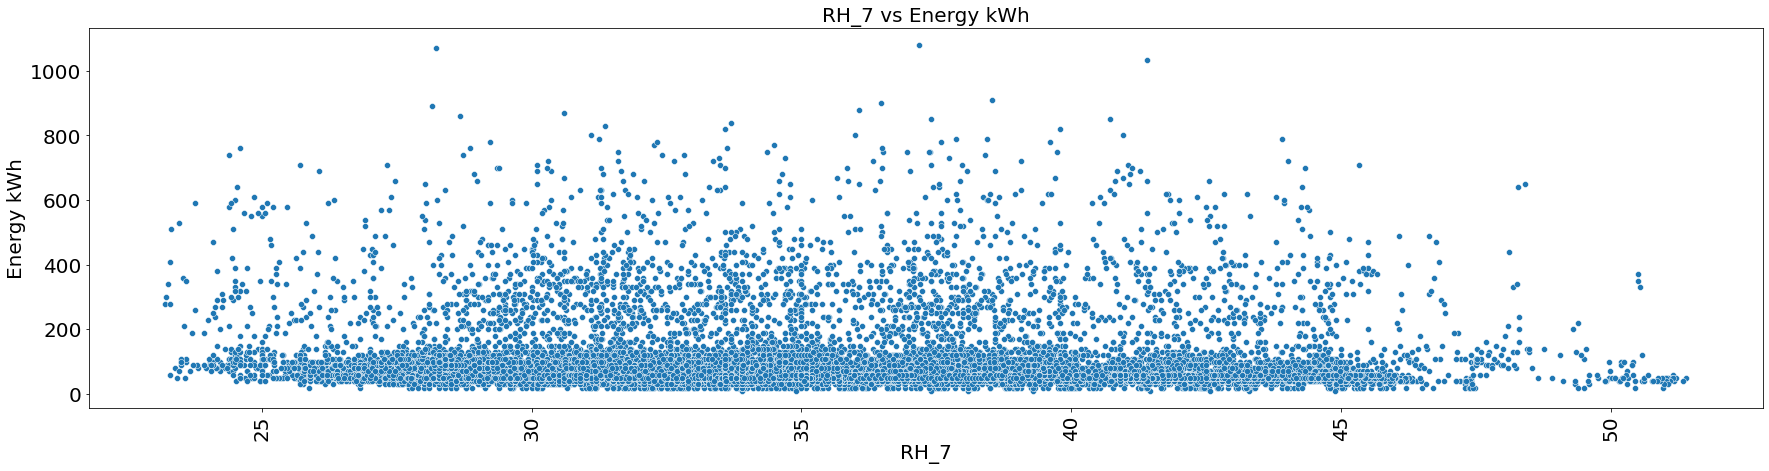

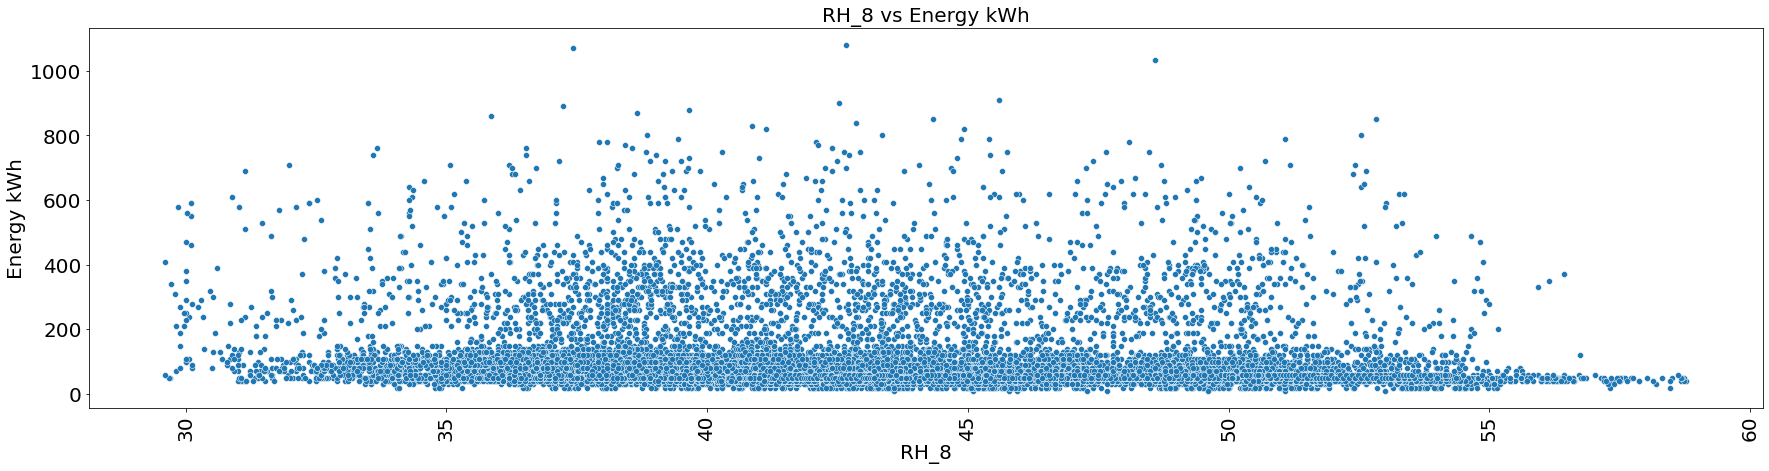

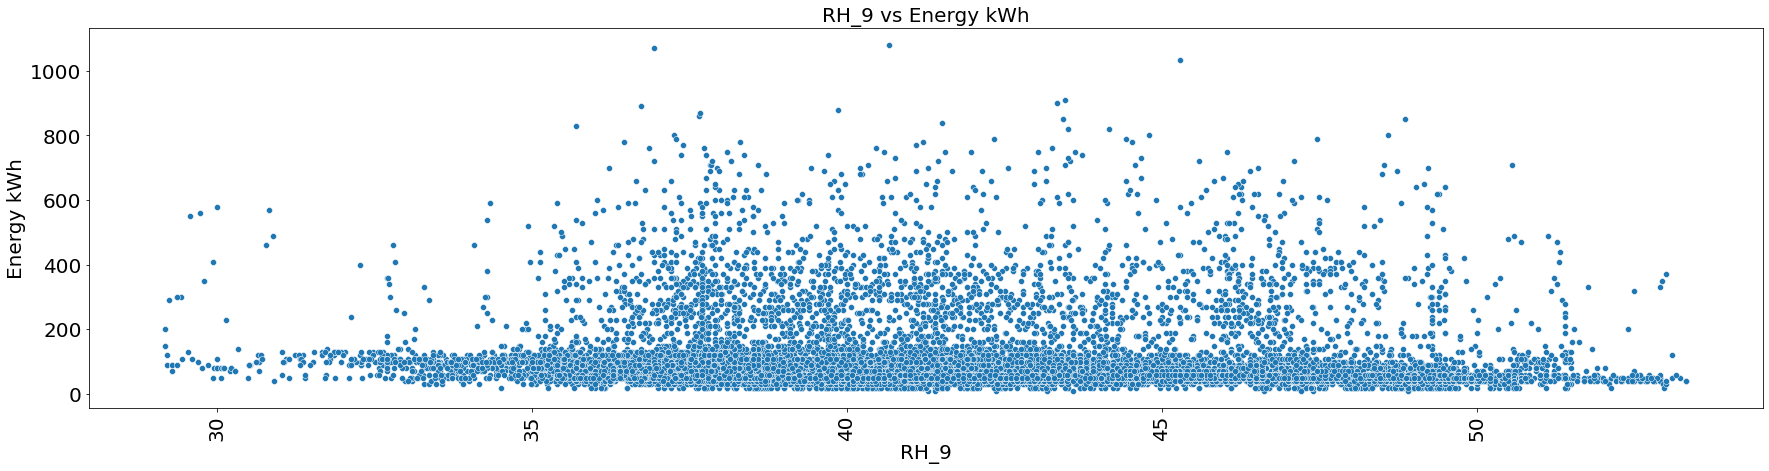

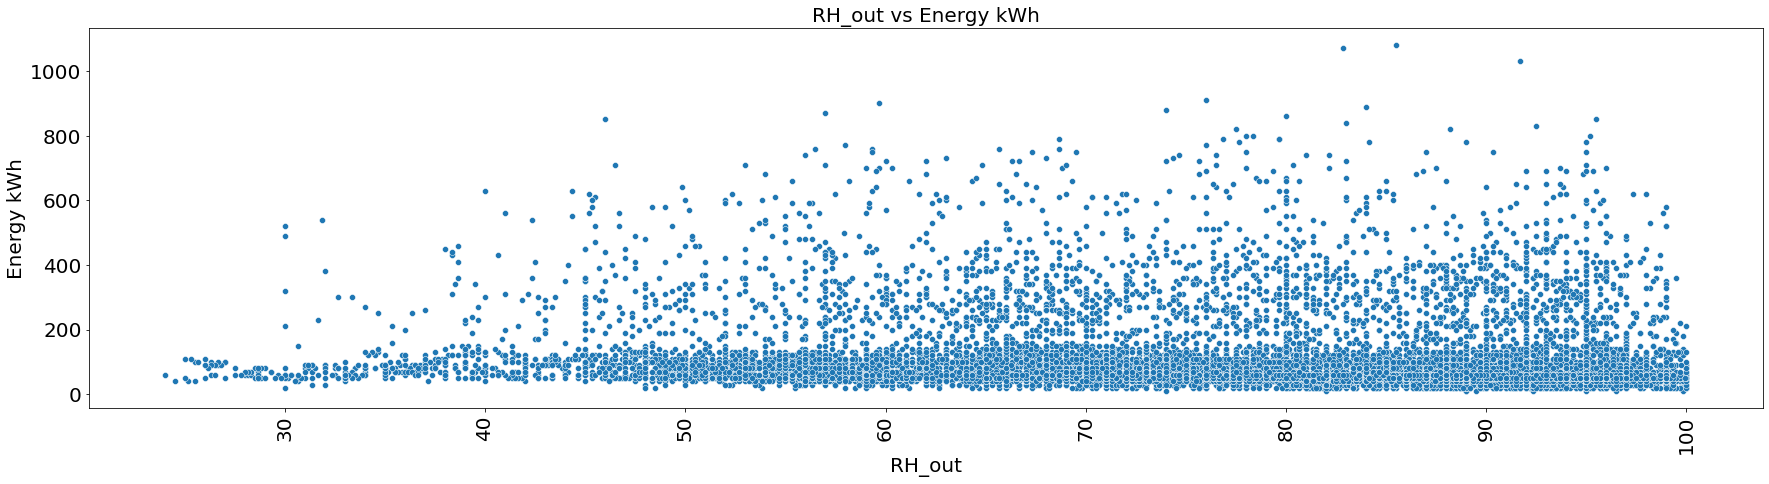

In [25]:
numeric_cols2 = ['Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','T1', 'T2','T3','T4','T5','T6','T7','T8', 'T9','T_out',
               'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9', 'RH_out']

# numeric_cols2 = ['Energy kWh']

for cols in numeric_cols2:
    plt.figure(figsize=(30,7))
    plt.title(cols+' vs Energy kWh',fontdict={'fontsize': 20})
    sns.scatterplot(data=clean_df,x=cols,y='Energy kWh')
    # plt.xlabel('hour_minute')
    plt.xticks(fontsize=20,rotation = 90)
    plt.yticks(fontsize=20)
    plt.xlabel(cols,fontdict={'fontsize': 20})
    plt.ylabel('Energy kWh',fontdict={'fontsize': 20})
    plt.show()

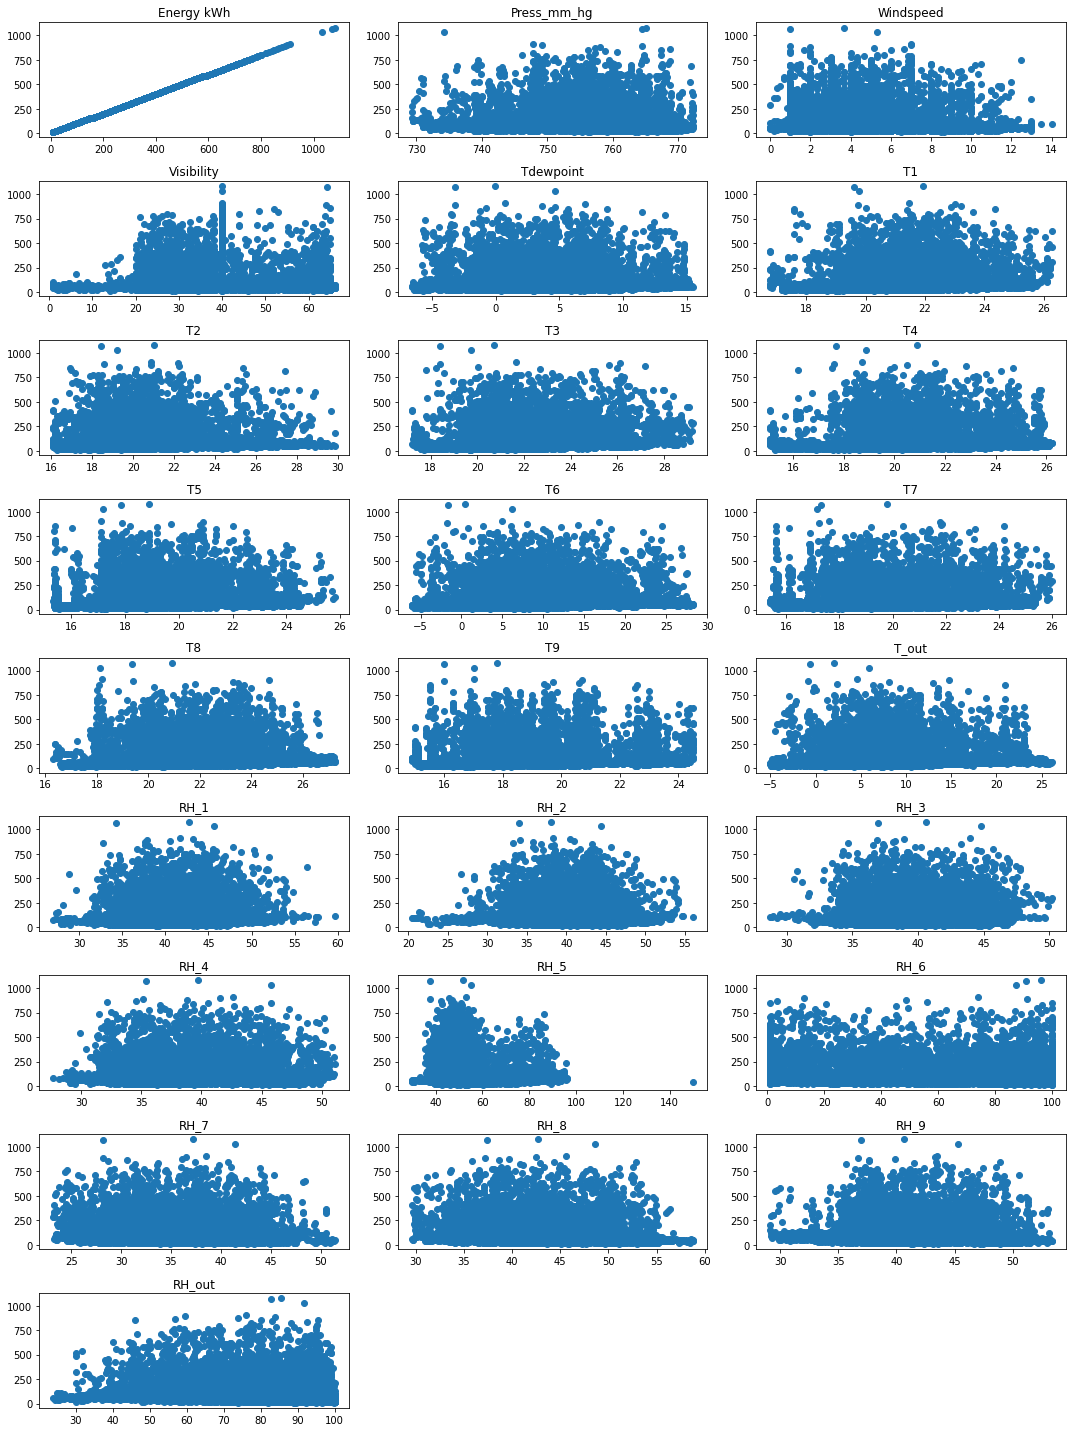

In [35]:
numeric_cols2 = ['Energy kWh','Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','T1', 'T2','T3','T4','T5','T6','T7','T8', 'T9','T_out',
               'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9', 'RH_out']

data_vis2 = clean_df[numeric_cols2]
# Calculate the number of subplots
num_plots = data_vis2.shape[1]

# Calculate the number of rows and columns for the subplots
num_rows = 9
num_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each column and plot in a separate subplot
for i, column in enumerate(data_vis2.columns):
    # Select the current subplot
    ax = axes[i]

    # Plot the column data
    ax.scatter(x=data_vis2[column],y=data_vis2['Energy kWh'])

    # Set the subplot title
    ax.set_title(column)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

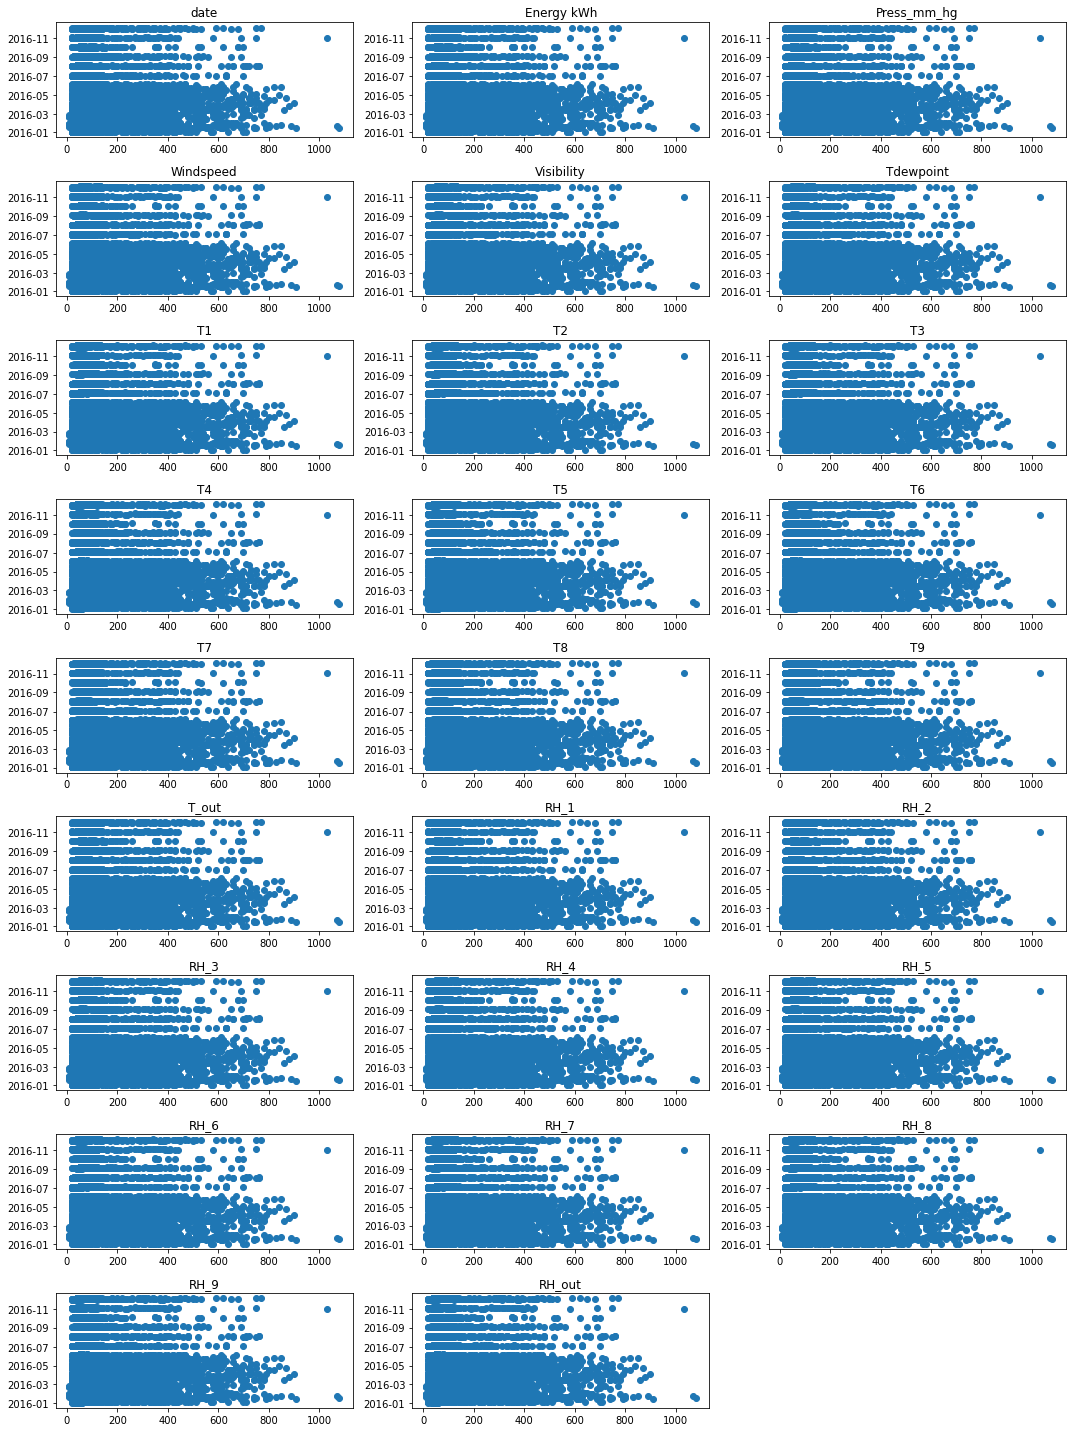

In [14]:
numeric_cols2 = ['date','Energy kWh','Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','T1', 'T2','T3','T4','T5','T6','T7','T8', 'T9','T_out',
               'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9', 'RH_out']

data_vis2 = clean_df[numeric_cols2]
# Calculate the number of subplots
num_plots = data_vis2.shape[1]

# Calculate the number of rows and columns for the subplots
num_rows = 9
num_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each column and plot in a separate subplot
for i, column in enumerate(data_vis2.columns):
    # Select the current subplot
    ax = axes[i]

    # Plot the column data
    ax.scatter(x=data_vis2['Energy kWh'],y=data_vis2['date'])

    # Set the subplot title
    ax.set_title(column)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

Pearson correlation coefficient: 0.0541926077227658


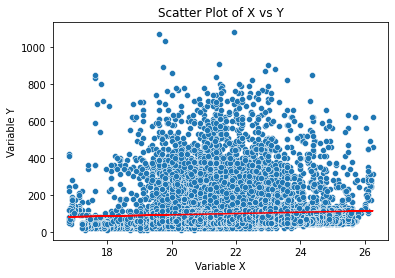

In [30]:
# Calculate the correlation coefficient
corr, _ = pearsonr(clean_df['T1'], clean_df['Energy kWh'])
print("Pearson correlation coefficient:", corr)

# Create a scatter plot with a fitted regression line
sns.scatterplot(data=clean_df,x='T1',y='Energy kWh')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Scatter Plot of X vs Y')

# Add a fitted regression line
m, b = np.polyfit(clean_df['T1'], clean_df['Energy kWh'], 1)  # Fit a linear regression line
plt.plot(clean_df['T1'], m * clean_df['T1'] + b, color='red')

plt.show()

Pearson correlation coefficient: 0.0541926077227658


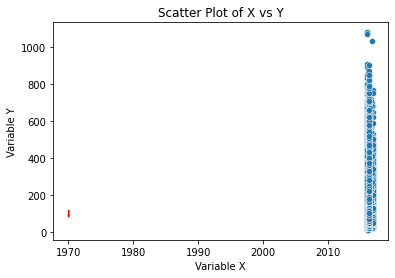

In [15]:
# Calculate the correlation coefficient
corr, _ = pearsonr(clean_df['T1'], clean_df['Energy kWh'])
print("Pearson correlation coefficient:", corr)

# Create a scatter plot with a fitted regression line
sns.scatterplot(data=clean_df,x='date',y='Energy kWh')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Scatter Plot of X vs Y')

# Add a fitted regression line
m, b = np.polyfit(clean_df['T1'], clean_df['Energy kWh'], 1)  # Fit a linear regression line
plt.plot(clean_df['T1'], m * clean_df['T1'] + b, color='red')

plt.show()

In [ ]:
clean_df.

Pearson correlation coefficient: -0.036612619576826586


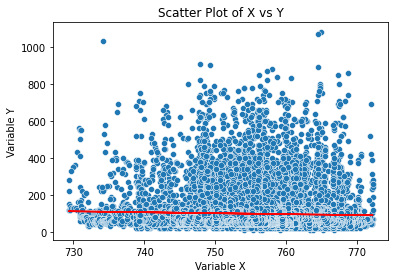

Pearson correlation coefficient: 0.08712674448509557


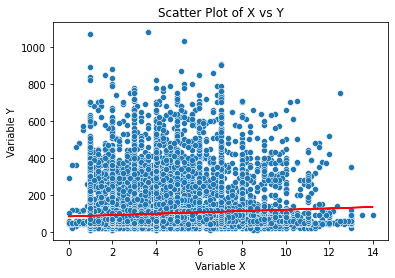

Pearson correlation coefficient: 0.0008284858430475019


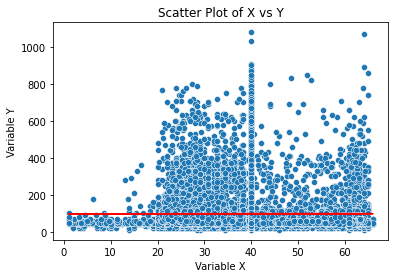

Pearson correlation coefficient: 0.014732396383795771


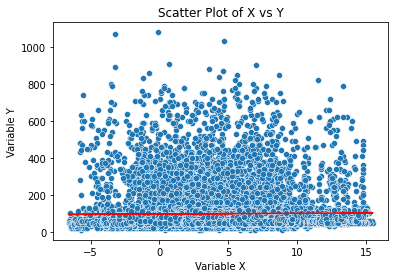

Pearson correlation coefficient: 0.0541926077227658


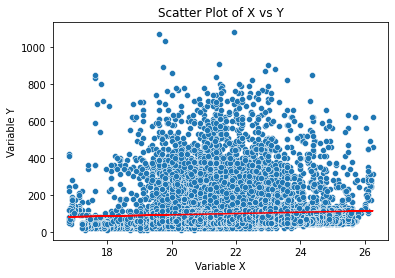

Pearson correlation coefficient: 0.11912081750760337


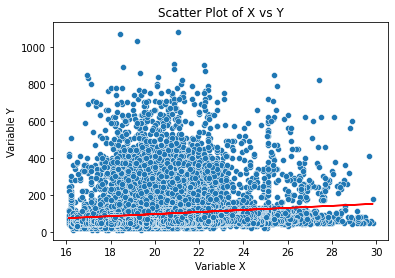

Pearson correlation coefficient: 0.08366128531408833


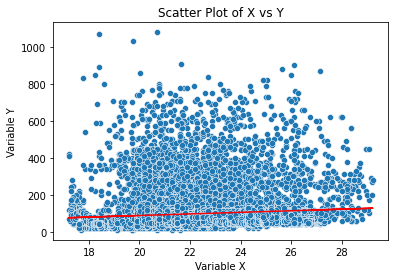

Pearson correlation coefficient: 0.03926569915001368


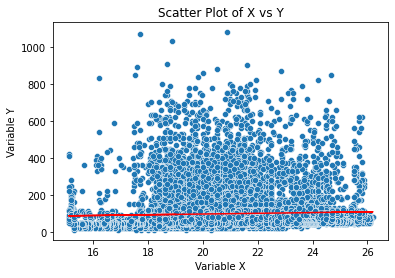

Pearson correlation coefficient: 0.01863567209722465


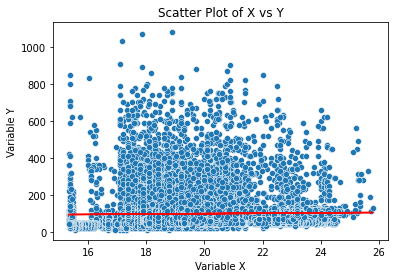

Pearson correlation coefficient: 0.1167701576117521


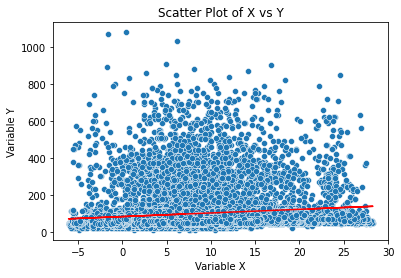

Pearson correlation coefficient: 0.024639624738912683


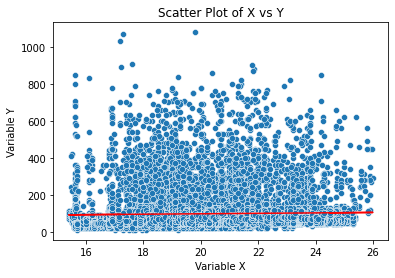

Pearson correlation coefficient: 0.038191055573747995


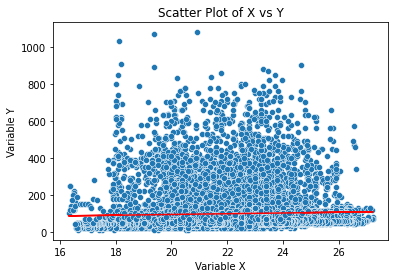

Pearson correlation coefficient: 0.00895477438031161


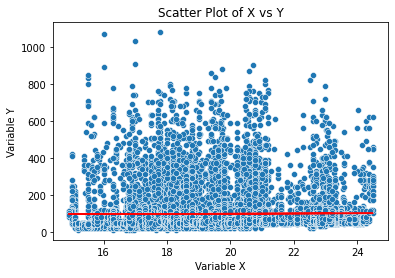

Pearson correlation coefficient: 0.09821095494944757


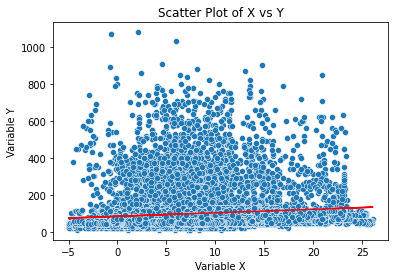

Pearson correlation coefficient: 0.08589143507370268


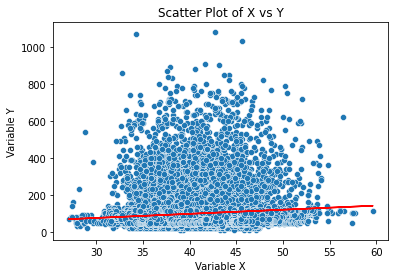

Pearson correlation coefficient: -0.06030281521601541


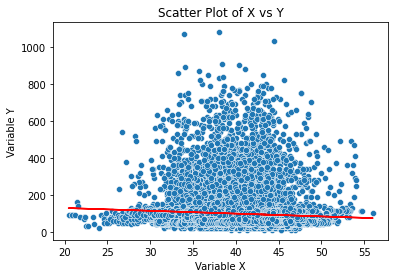

Pearson correlation coefficient: 0.036799817516514


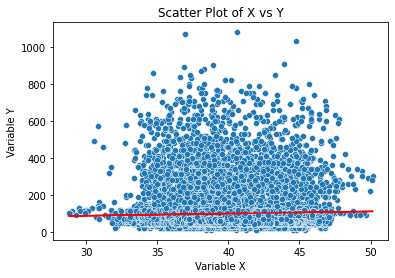

Pearson correlation coefficient: 0.017229603655348435


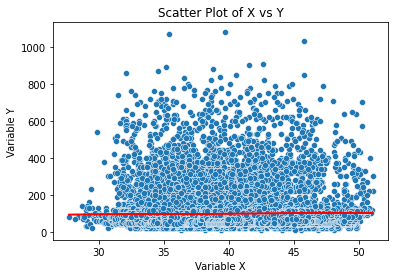

Pearson correlation coefficient: 0.0067194937250467535


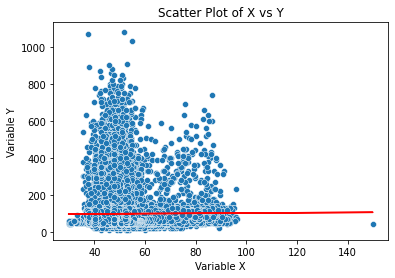

Pearson correlation coefficient: -0.08238249193437608


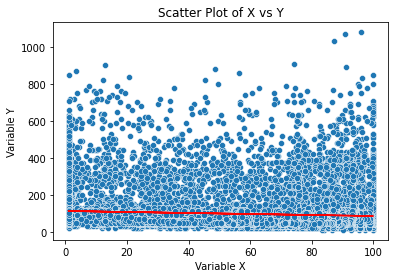

Pearson correlation coefficient: -0.05575451878972626


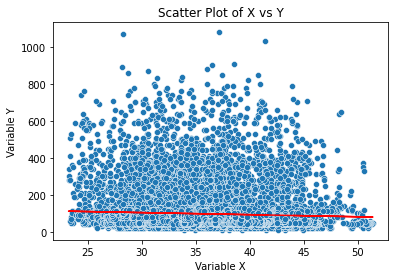

Pearson correlation coefficient: -0.09385547148838652


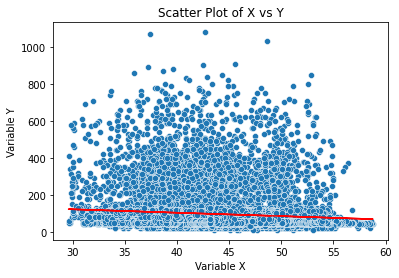

Pearson correlation coefficient: -0.05144937378456666


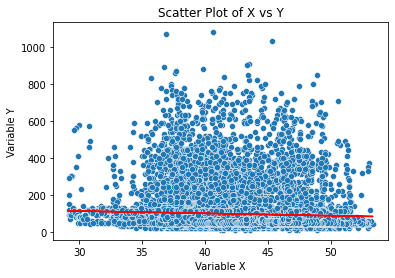

Pearson correlation coefficient: -0.15146027756605582


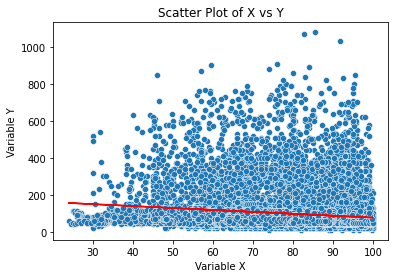

In [31]:
numeric_cols2 = ['Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','T1', 'T2','T3','T4','T5','T6','T7','T8', 'T9','T_out',
               'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9', 'RH_out']

for cols in numeric_cols2:
    # Calculate the correlation coefficient
    corr, _ = pearsonr(clean_df[cols], clean_df['Energy kWh'])
    print("Pearson correlation coefficient:", corr)

    # Create a scatter plot with a fitted regression line
    sns.scatterplot(data=clean_df,x=cols,y='Energy kWh')
    plt.xlabel('Variable X')
    plt.ylabel('Variable Y')
    plt.title('Scatter Plot of X vs Y')

    # Add a fitted regression line
    m, b = np.polyfit(clean_df[cols], clean_df['Energy kWh'], 1)  # Fit a linear regression line
    plt.plot(clean_df[cols], m * clean_df[cols] + b, color='red')

    plt.show()

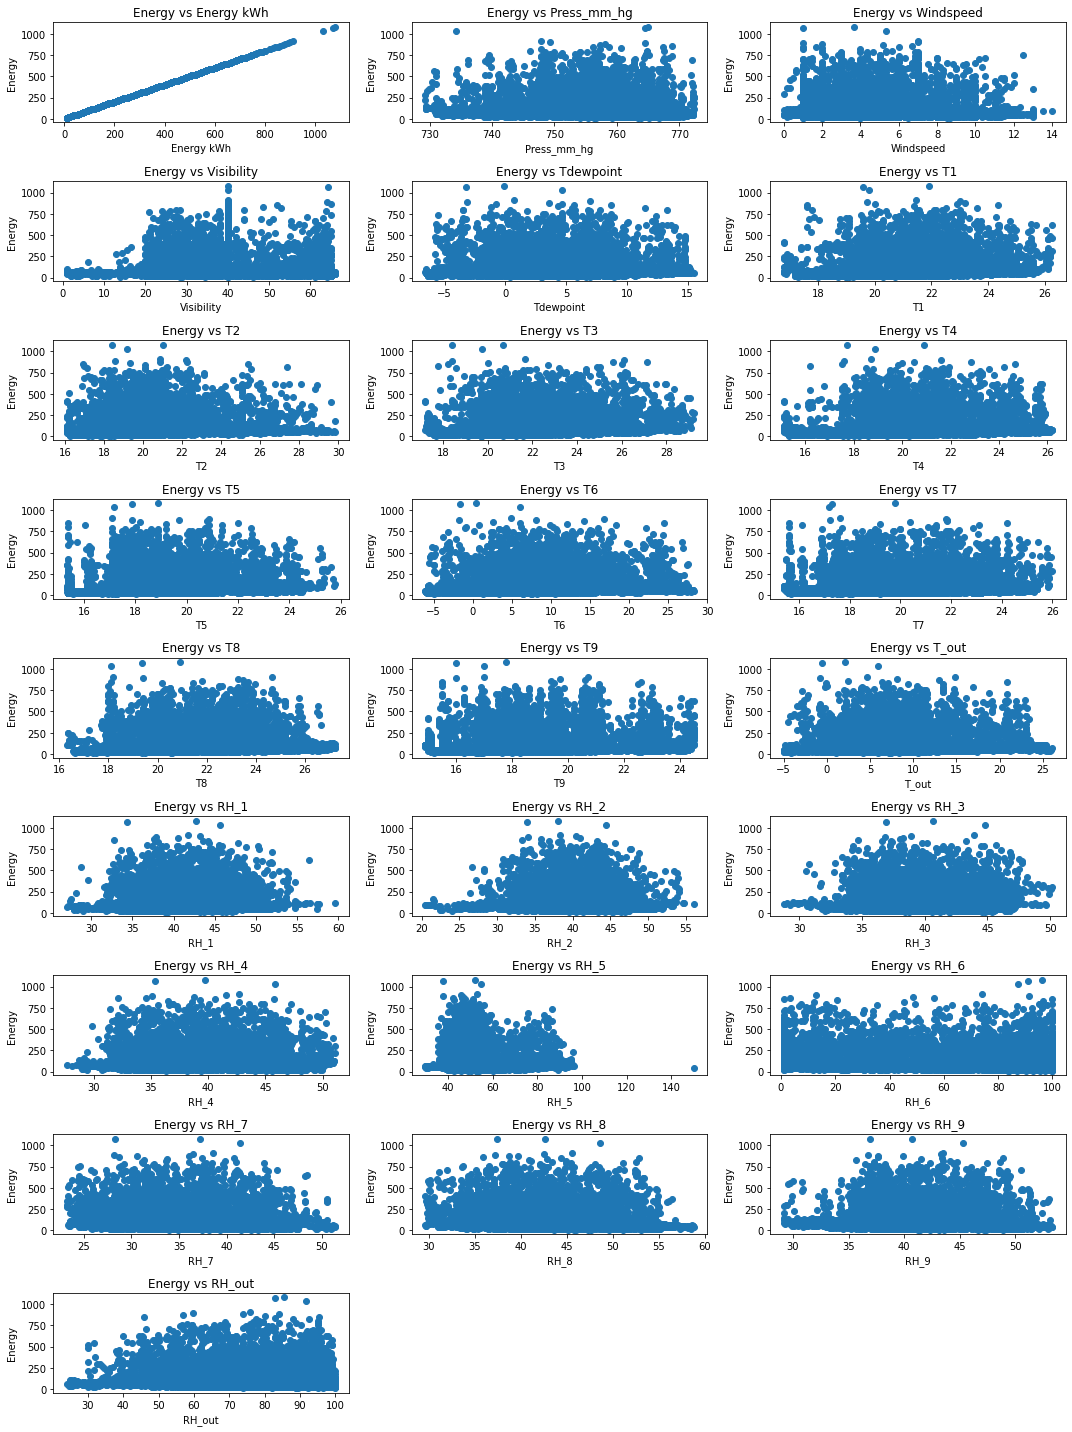

In [46]:
numeric_cols2 = ['Energy kWh','Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','T1', 'T2','T3','T4','T5','T6','T7','T8', 'T9','T_out',
               'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9', 'RH_out']

data_vis2 = clean_df[numeric_cols2]
# Calculate the number of subplots
num_plots = data_vis2.shape[1]

# Calculate the number of rows and columns for the subplots
num_rows = 9
num_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each column and plot in a separate subplot
for i, column in enumerate(data_vis2.columns):
    corr, _ = pearsonr(data_vis2[cols], data_vis2['Energy kWh'])
    # Select the current subplot
    ax = axes[i]

    # Plot the column data
    ax.scatter(x=data_vis2[column],y=data_vis2['Energy kWh'])
    ax.set_xlabel(column)
    ax.set_ylabel('Energy')

    # Set the subplot title
    ax.set_title('Energy vs '+column)
        # Add a fitted regression line
    m, b = np.polyfit(data_vis2[cols], data_vis2['Energy kWh'], 1)  # Fit a linear regression line
#     ax.plot(data_vis2[cols], m * data_vis2[cols] + b, color='red')

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()